In [1]:
import keras
from keras.datasets import cifar10

(x_train,y_train),(x_test, y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


# Visualize the dataset




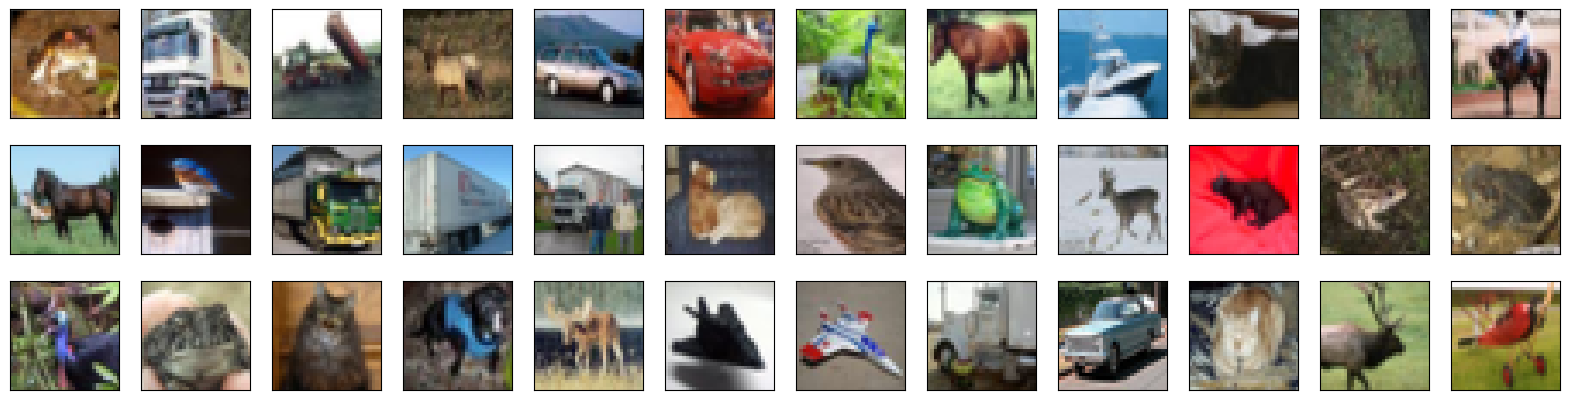

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
for i in range(36):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

# Normalize the data

In [3]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

# Breaking dataset into training testing and validation

In [4]:
import tensorflow
from tensorflow import keras

num_classes=len(np.unique(y_train))

y_train=tensorflow.keras.utils.to_categorical(y_train,num_classes)
y_test=tensorflow.keras.utils.to_categorical(y_test,num_classes)

(x_train, x_valid)=x_train[5000:],x_train[:5000]
(y_train, y_valid)=y_train[5000:],y_train[:5000]

print("X_train shape",x_train.shape)

print(x_train.shape[0],'train sample')
print(x_test.shape[0],'train sample')
print(x_valid.shape[0],'train sample')


X_train shape (45000, 32, 32, 3)
45000 train sample
10000 train sample
5000 train sample


# Define Model architechture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense , Dropout

model=Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [10]:
from  keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath="model.weights.best.keras",save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=32,  epochs=10, validation_data=(x_valid,y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/10
1407/1407 - 14s - 10ms/step - accuracy: 0.4129 - loss: 1.6090 - val_accuracy: 0.5226 - val_loss: 1.3130
Epoch 2/10
1407/1407 - 4s - 3ms/step - accuracy: 0.5463 - loss: 1.2640 - val_accuracy: 0.5982 - val_loss: 1.1183
Epoch 3/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6058 - loss: 1.1202 - val_accuracy: 0.5672 - val_loss: 1.2775
Epoch 4/10
1407/1407 - 4s - 3ms/step - accuracy: 0.6391 - loss: 1.0354 - val_accuracy: 0.6214 - val_loss: 1.1110
Epoch 5/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6600 - loss: 0.9798 - val_accuracy: 0.6296 - val_loss: 1.1494
Epoch 6/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6698 - loss: 0.9514 - val_accuracy: 0.5410 - val_loss: 1.3955
Epoch 7/10
1407/1407 - 4s - 3ms/step - accuracy: 0.6822 - loss: 0.9218 - val_accuracy: 0.7026 - val_loss: 0.8663
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6891 - loss: 0.9155 - val_accuracy: 0.6664 - val_loss: 1.0539
Epoch 9/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6945 - loss: 0.9002 - val_accuracy: 0.6758 

# Load the model

In [11]:
model.load_weights("model.weights.best.keras")

In [12]:
y_hat=model.predict(x_test)
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


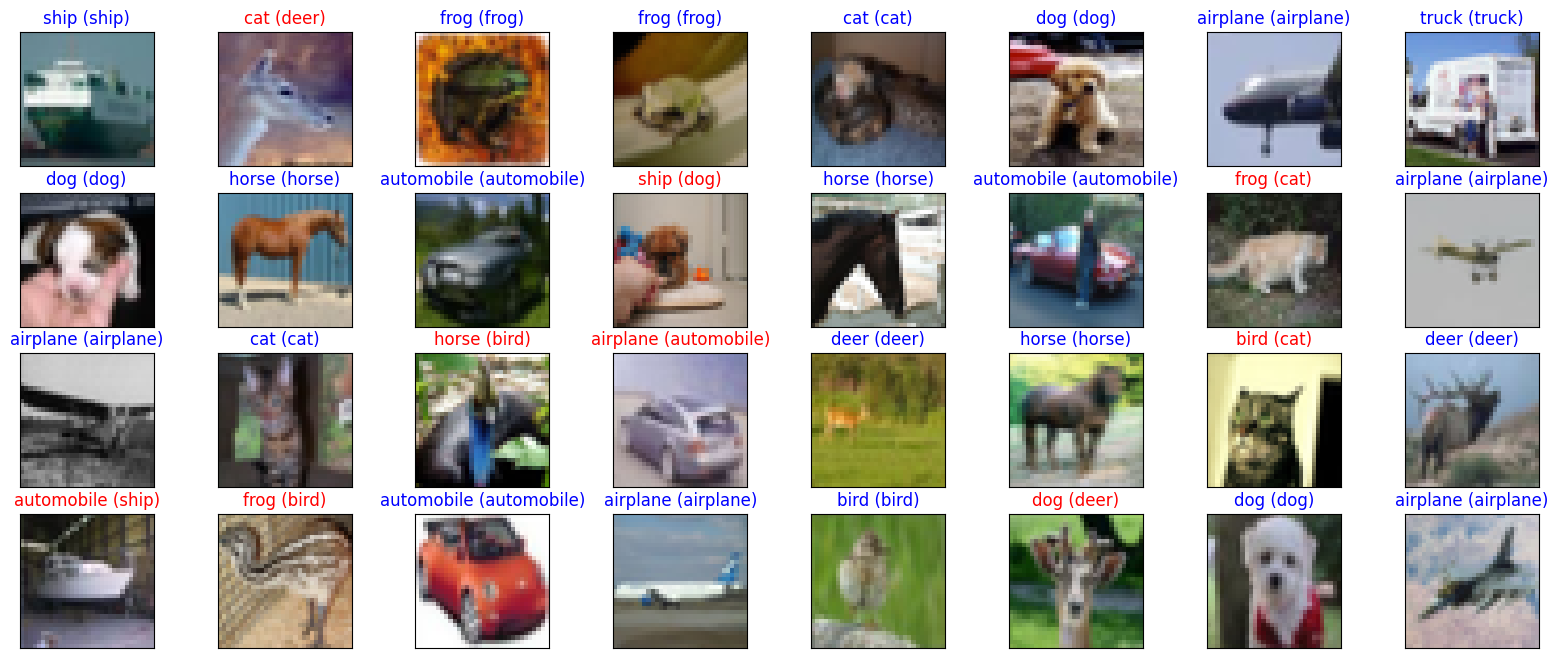

In [13]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))